# Spectral sensitivity measurements

Conducted by Hans Hubert Sams <br>
Supervised by Tõnis Eenmäe and Ilmar Ansko <br>
Date: 07/11/2019 <br>
Jira task: https://jira.estcube.eu/browse/IIS18-186 <br>

## Test equipment and setup

Test subject: Onsemi mt9p031 Mono (used for ESTCube 2 star tracker) <br>
Test location: Tartu Observatory, cleanroom (optics lab) <br><br>

Testing was done with *insert spectroscope model here* using a lintlamp SI-300/10 S/N 001 as a light source. The spectral band covered was from 300-1200 nm with a 5 nm step and 5 nm bandwidth. In each step 10 frames vere captured and occasionally the exposure time was adjusted to avoid saturation or underexposure. In addition, 10 dark frames were also captured for each exposure time.

### Analysis

First, the frames had to be prepared for analysis. Example code for that can be found here: https://pastebin.com/zHWrEdnT <br> <br>
After that is done, first lets display the relative spectral sensitivity to visualize the shape of the curve and see, if it matches our expectations. For that we first have to divide the median data with the irradiance of the light source.

Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

Read the information from text files.

In [2]:
path = "E:\\Important stuff\\Projects\\Sensori testid\\ESEO sekundaar\\Spectral_sensitivity\\"

f = open(path+'medianData.txt')
# Remove the headers
f.readline()

medianData = [[],[]] # wavelenght, value

for row in f:
    row = row.split('\t')
    medianData[0].append(float(row[0]))
    medianData[1].append(float(row[1].replace('\n','')))
    
f.close()
f = open(path+'source.txt')
# Remove the headers
f.readline()

sourceData = [[],[],[]] # wavelenght, irradiance (w/m2), uncertainty(%)

for row in f:
    row = row.split('\t')
    sourceData[0].append(float(row[0]))
    sourceData[1].append(float(row[1]))
    sourceData[2].append(float(row[1].replace('\n','')))
    
f.close()

Divide the median values with the irradiance value at the same wavelenght. Since the light source irradiance data is from 300-1100 nm and median data is from 350-1200 nm we can only display information in the range of 350 - 1100 nm.

In [3]:
# Adjust both arrays to match the other array

medianData = [medianData[0][0:len(medianData[0])-20],medianData[1][0:len(medianData[1])-20]]
sourceData = [sourceData[0][10:],sourceData[1][10:],sourceData[2][10:]]

# Conduct division
medianCorrected = np.divide(medianData[1],sourceData[1])


Now, lets display the results of a graph.

No handles with labels found to put in legend.


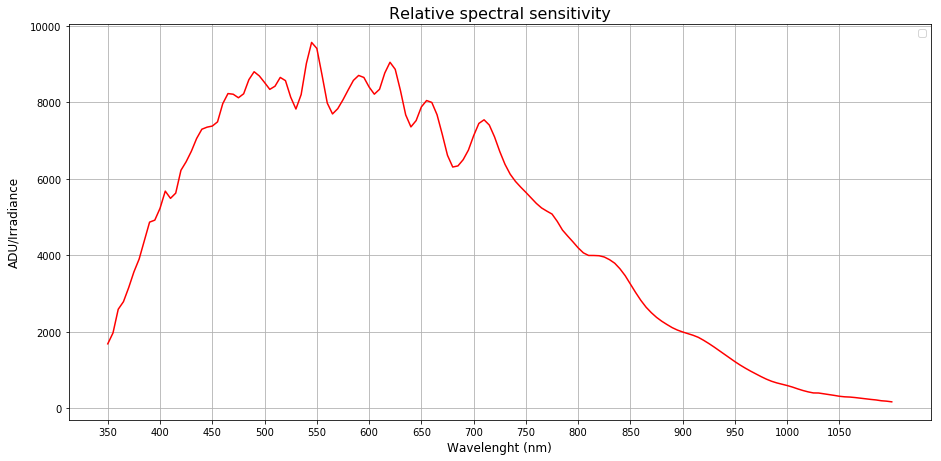

In [4]:
x = medianData[0]

fig1 = plt.figure(figsize=(34,16))
ax1 = fig1.add_subplot(2,2,1)
ax1.plot(x,medianCorrected, "r", label = "")
ax1.set_xlabel("Wavelenght (nm)",fontsize=12)
ax1.set_ylabel("ADU/Irradiance",fontsize=12,labelpad=10)
ax1.set_title("Relative spectral sensitivity",fontsize=16)
ax1.grid(True,which='both')
ax1.set_xticks(np.arange(350, 1100, step=50))
ax1.legend()

Next, lets try to determine the absolute spectral sensitivity. For that we need previously determined gain (e/ADU) and irradiance of the lamp. Source data is already in units of W/m^2 so we can use the data directly. Basically we look for how many photons reach the pixel and how many ADUs were produced. THen we multiply that with the gain and find the ration between number of photons and number of electrons.

No handles with labels found to put in legend.


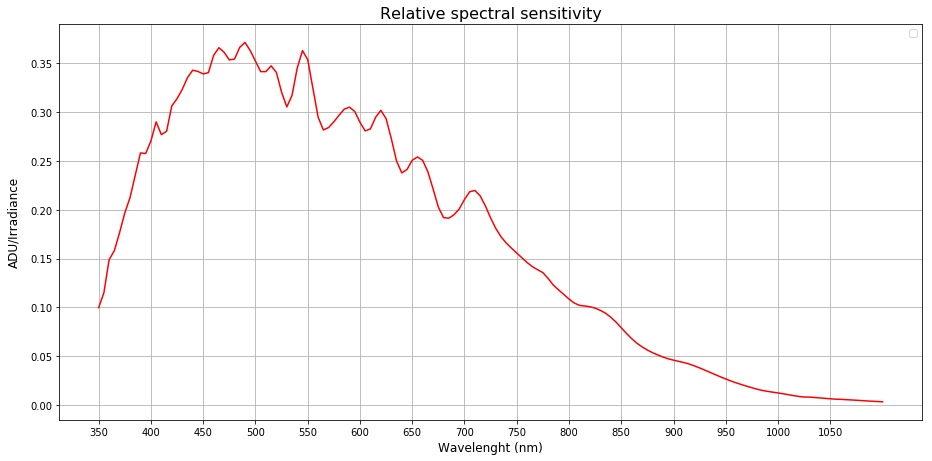

In [5]:
# Define parameters of the sensor
gain = 1.68 # Electrons/ADU
A = 2.2E-6**2 # Pixel area
t = 1/300 # Shutter speed

photonsNr = []
for i in range(len(sourceData[0])):
    E = sourceData[1][i]*A*t
    E_ph = const.h*const.c/float(sourceData[0][i]*1e-9)
    n_ph = E/E_ph
    photonsNr.append(n_ph)

electronsNr = []
for i in range(len(medianData[0])):
    n_E = medianData[1][i]*gain
    electronsNr.append(n_E)

QE = np.divide(electronsNr,photonsNr)

fig1 = plt.figure(figsize=(34,16))
ax1 = fig1.add_subplot(2,2,1)
ax1.plot(x,QE, "r", label = "")
ax1.set_xlabel("Wavelenght (nm)",fontsize=12)
ax1.set_ylabel("ADU/Irradiance",fontsize=12,labelpad=10)
ax1.set_title("Absolute spectral sensitivity",fontsize=16)
ax1.grid(True,which='both')
ax1.set_xticks(np.arange(350, 1100, step=50))
ax1.legend()